In [108]:
import requests 
import pandas as pd 
import numpy as np
!pip install folium
import folium

In [109]:
CLIENT_ID = 'LNUQ1C4ZOQZBR10GEO5RJ3IDRY3UDWV3LH0WL44LAOC33BI4' # your Foursquare ID
CLIENT_SECRET = 'D3QUH5JQ4FJ1ZDWBDU3FC5TMZSCHZWSDQMV1ZZAIYDXIUZOV' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 40
print('Atosa Moayedi:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Atosa Moayedi:
CLIENT_ID: LNUQ1C4ZOQZBR10GEO5RJ3IDRY3UDWV3LH0WL44LAOC33BI4
CLIENT_SECRET:D3QUH5JQ4FJ1ZDWBDU3FC5TMZSCHZWSDQMV1ZZAIYDXIUZOV


In [110]:
import requests

request_parameters = {
    "client_id": CLIENT_ID,
    "client_secret": CLIENT_SECRET,
    "v": '20180605',
    "section": "food",
    "near": "Manhattan",
    "radius": 2000,
    "limit": 100}

data = requests.get("https://api.foursquare.com/v2/venues/explore", params=request_parameters)

In [111]:
d = data.json()["response"]
d.keys()

dict_keys(['suggestedFilters', 'geocode', 'headerLocation', 'headerFullLocation', 'headerLocationGranularity', 'query', 'totalResults', 'suggestedBounds', 'groups'])

In [112]:
d["headerLocationGranularity"], d["headerLocation"], d["headerFullLocation"]

('city', 'Manhattan', 'Manhattan')

In [113]:
d["suggestedBounds"], d["totalResults"]

({'ne': {'lat': 40.79609717824817, 'lng': -73.94844743656466},
  'sw': {'lat': 40.77045442008342, 'lng': -73.98535383214212}},
 247)

In [114]:
d["geocode"]

{'what': '',
 'where': 'manhattan',
 'center': {'lat': 40.78343, 'lng': -73.96625},
 'displayString': 'Manhattan, NY, United States',
 'cc': 'US',
 'geometry': {'bounds': {'ne': {'lat': 40.882214, 'lng': -73.907},
   'sw': {'lat': 40.679548, 'lng': -74.047285}}},
 'slug': 'manhattan-manhattan-new-york-united-states',
 'longId': '72057594043053707'}

In [115]:
d["groups"][0].keys()

dict_keys(['type', 'name', 'items'])

In [116]:
d["groups"][0]["type"], d["groups"][0]["name"]

('Recommended Places', 'recommended')

In [117]:
items = d["groups"][0]["items"]
print("number of items: %i" % len(items))
items[0]

number of items: 100


{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '54419745498e8a6b5608301b',
  'name': 'The Milling Room',
  'location': {'address': '446 Columbus Ave',
   'crossStreet': 'at W 81st St',
   'lat': 40.78353091218605,
   'lng': -73.97429517481174,
   'labeledLatLngs': [{'label': 'display',
     'lat': 40.78353091218605,
     'lng': -73.97429517481174}],
   'postalCode': '10024',
   'cc': 'US',
   'city': 'New York',
   'state': 'NY',
   'country': 'United States',
   'formattedAddress': ['446 Columbus Ave (at W 81st St)',
    'New York, NY 10024',
    'United States']},
  'categories': [{'id': '4bf58dd8d48988d14e941735',
    'name': 'American Restaurant',
    'pluralName': 'American Restaurants',
    'shortName': 'American',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_',
     'suffix': '.png'},
    'primary': True}],
  'photos': {'count': 0, 'gro

In [118]:
df_raw = []
for item in items:
    venue = item["venue"]
    categories, uid, name, location = venue["categories"], venue["id"], venue["name"], venue["location"]
    print(location)
    assert len(categories) == 1
    shortname = categories[0]["shortName"]
    address =  ''
    if hasattr(location, 'address'):
      address = location['address']
    if not "postalCode" in location:
        continue
    postalcode = location["postalCode"]
    lat = location["lat"]
    lng = location["lng"]
    datarow = (uid, name, shortname, address, postalcode, lat, lng)
    df_raw.append(datarow)


{'address': '446 Columbus Ave', 'crossStreet': 'at W 81st St', 'lat': 40.78353091218605, 'lng': -73.97429517481174, 'labeledLatLngs': [{'label': 'display', 'lat': 40.78353091218605, 'lng': -73.97429517481174}], 'postalCode': '10024', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['446 Columbus Ave (at W 81st St)', 'New York, NY 10024', 'United States']}
{'address': '1085 5th Ave', 'crossStreet': 'at 5th Ave', 'lat': 40.78375703091576, 'lng': -73.95852577546304, 'labeledLatLngs': [{'label': 'display', 'lat': 40.78375703091576, 'lng': -73.95852577546304}, {'label': 'entrance', 'lat': 40.78385, 'lng': -73.958486}], 'postalCode': '10128', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1085 5th Ave (at 5th Ave)', 'New York, NY 10128', 'United States']}
{'address': '489 Columbus Ave', 'lat': 40.784842463371454, 'lng': -73.97325299421942, 'labeledLatLngs': [{'label': 'display', 'lat': 40.7848424

In [119]:
df = pd.DataFrame(df_raw, columns=["uid", "name", "shortname", "address", "postalcode", "lat", "lng"])
print("found %i cafes" % len(df))
df

found 99 cafes


,uid,name,shortname,address,postalcode,lat,lng
0,54419745498e8a6b5608301b,The Milling Room,American,,10024,40.783531,-73.974295
1,4bc38504abf4952123e0c393,Bluestone Lane,Café,,10128,40.783757,-73.958526
2,591890f43abcaf1ddca66e85,Ashoka,Indian,,10024,40.784842,-73.973253
3,57d21135498ee7584bdc048a,Motorino,Pizza,,10024,40.785586,-73.972842
4,49fa2837f964a520cf6d1fe3,Café Sabarsky,Austrian,,10028,40.781445,-73.960385
...,...,...,...,...,...,...,...
94,545bba1b498e5e6a2588c827,Maison Kayser,Bakery,,10024,40.781982,-73.981292
95,4d5347a0bdbea1cdcdb2da92,Heidi's House By The Side Of The Road,Comfort Food,,10075,40.772481,-73.955053
96,5740746c498eb824a3fc8079,Corner Bagel Shop,Bagels,,10128,40.783004,-73.950670
97,591b6df695d986522a5ddd50,Sushi Kaito,Sushi,,10023,40.779442,-73.983676


In [127]:
df.rename(columns={'shortname':'Type of Restaurant'}, inplace= True)
df.head()

,uid,name,Type of Restaurant,address,postalcode,lat,lng
0,54419745498e8a6b5608301b,The Milling Room,American,,10024,40.783531,-73.974295
1,4bc38504abf4952123e0c393,Bluestone Lane,Café,,10128,40.783757,-73.958526
2,591890f43abcaf1ddca66e85,Ashoka,Indian,,10024,40.784842,-73.973253
3,57d21135498ee7584bdc048a,Motorino,Pizza,,10024,40.785586,-73.972842
4,49fa2837f964a520cf6d1fe3,Café Sabarsky,Austrian,,10028,40.781445,-73.960385


In [128]:
Manhattan= d["geocode"]["center"]
Manhattan

{'lat': 40.78343, 'lng': -73.96625}

In [129]:
from folium import plugins


map_Manhattan = folium.Map(location=[40.78343, -73.96625], zoom_start=13)

def add_markers(df):
    for (j, row) in df.iterrows():
        label = folium.Popup(row["name"], parse_html=True)
        folium.CircleMarker(
            [row["lat"], row["lng"]],
            radius=5,
            popup=label,
            color='red',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(map_Manhattan)

add_markers(df)
hm_data = df[["lat", "lng"]].to_numpy().tolist()
map_Manhattan.add_child(plugins.HeatMap(hm_data))

map_Manhattan

In [130]:
df_Manhattan=df.groupby('Type of Restaurant'). count()
df_Manhattan.head()

,uid,name,address,postalcode,lat,lng
Type of Restaurant,,,,,,
American,6,6,6,6,6,6
Asian,1,1,1,1,1,1
Austrian,1,1,1,1,1,1
Bagels,3,3,3,3,3,3
Bakery,8,8,8,8,8,8


In [131]:
df_Manhattan.drop(['name', 'address','postalcode','lat','lng'], axis=1, inplace=True)
df_Manhattan.head()

,uid
Type of Restaurant,
American,6
Asian,1
Austrian,1
Bagels,3
Bakery,8


In [132]:
df_Manhattan.rename(columns={'uid':'Number'}, inplace=True)
df_Manhattan.head()

,Number
Type of Restaurant,
American,6
Asian,1
Austrian,1
Bagels,3
Bakery,8


In [133]:
df_Manhattan.sort_values(['Number'], ascending=False, axis=0, inplace=True)
df_Manhattan.head()

,Number
Type of Restaurant,
Italian,13
Bakery,8
Café,7
American,6
Mediterranean,5


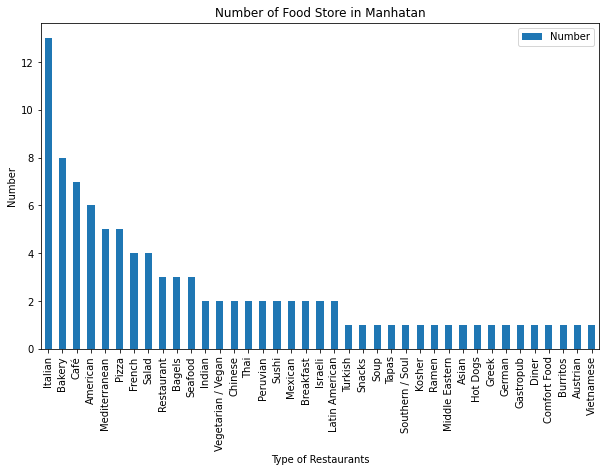

In [134]:
import matplotlib as mpl
import matplotlib.pyplot as plt

df_Manhattan.plot(kind='bar', figsize=(10,6))
plt.xlabel('Type of Restaurants') 
plt.ylabel('Number') 
plt.title('Number of Food Store in Manhatan') 

plt.show()